<a href="https://colab.research.google.com/github/ashley-ferreira/PHYS449_FinalProject/blob/main/notebooks/Test_v2_Testing_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install astroNN

In [2]:
from astroNN.datasets import galaxy10
from astroNN.datasets.galaxy10 import galaxy10cls_lookup
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
#from tensorflow.keras.layers import BatchNormalization
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from tqdm import tqdm

WARNING! APOGEE environment variable SDSS_LOCAL_SAS_MIRROR not set
WARNING! Gaia environment variable GAIA_TOOLS_DATA not set


# **Loading data**

In [3]:
images, labels = galaxy10.load_data()
labels = labels.astype(np.float32)
labels = to_categorical(labels)
images = images.astype(np.float32)
images = images/255

Galaxy10.h5:  97%|█████████▋| 205M/210M [00:06<00:00, 52.8MB/s]

Downloaded Galaxy10 successfully to /root/.astroNN/datasets/Galaxy10.h5


Galaxy10.h5: 210MB [00:07, 28.6MB/s]                           


# **Sample data**

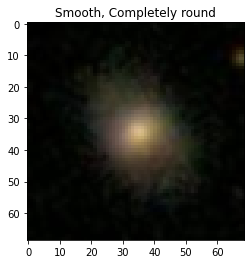

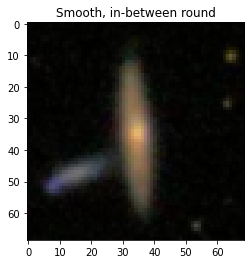

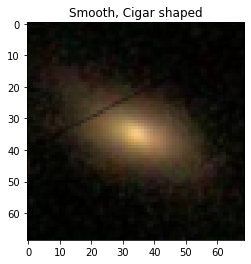

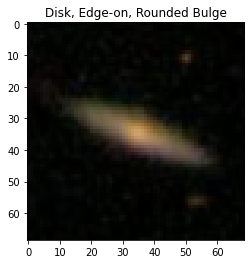

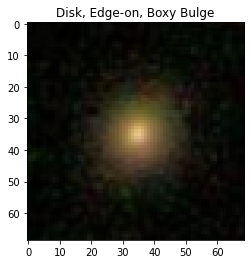

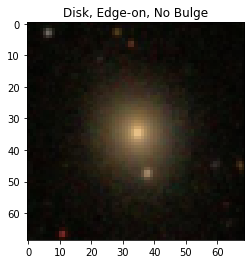

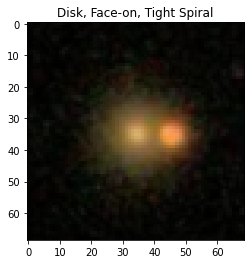

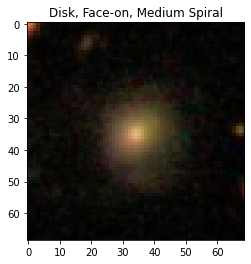

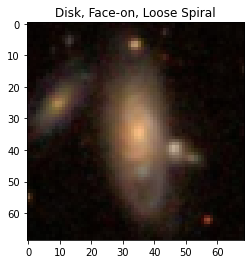

ValueError: ignored

In [4]:
def show_image(image_data,label):
    label = galaxy10cls_lookup(int(label))
    plt.imshow(image_data)
    plt.title(label)
    plt.show()
for i in range(1, 11):
    show_image(images[i], i)

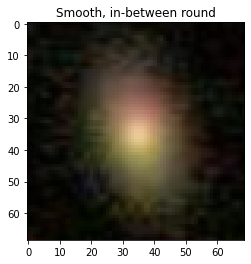

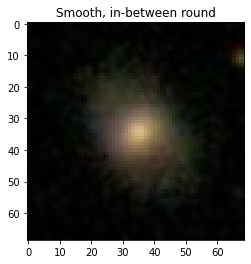

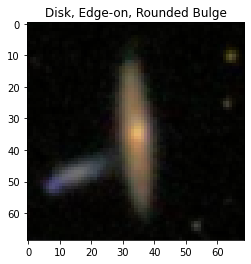

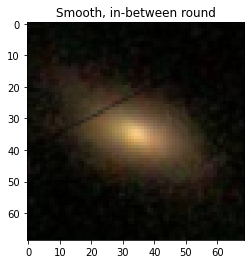

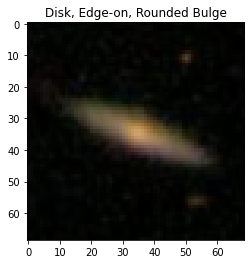

In [7]:
def show_image(image_num, label_num):
    label_name = int(np.where(label_num==1)[0])
    label = galaxy10cls_lookup(label_name)
    plt.imshow(image_num)
    plt.title(label)
    plt.show()
for i in range(0,5):
  show_image(images[i], labels[i])

# **Train and test data sets**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size = 0.15)
print(X_train.shape)
print(y_train.shape)

(18517, 69, 69, 3)
(18517, 10)


# **CNN model "C2"**

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(7, 7), input_shape=(69,69,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 63, 63, 32)        4736      
                                                                 
 batch_normalization (BatchN  (None, 63, 63, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 64)        51264     
                                                                 
 conv2d_2 (Conv2D)           (None, 23, 23, 64)        102464    
                                                                 
 batch_normalization_1 (Batc  (None, 23, 23, 64)       2

# **Training**

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
579/579 [==============================] - 444s 765ms/step - loss: 1.1912 - accuracy: 0.5393 - val_loss: 1.3476 - val_accuracy: 0.5153
Epoch 2/20
579/579 [==============================] - 445s 768ms/step - loss: 0.8529 - accuracy: 0.6829 - val_loss: 0.8895 - val_accuracy: 0.6735
Epoch 3/20
579/579 [==============================] - 441s 761ms/step - loss: 0.7355 - accuracy: 0.7273 - val_loss: 0.7571 - val_accuracy: 0.7264
Epoch 4/20
579/579 [==============================] - 444s 766ms/step - loss: 0.6777 - accuracy: 0.7513 - val_loss: 0.6407 - val_accuracy: 0.7635
Epoch 5/20
579/579 [==============================] - 443s 764ms/step - loss: 0.6314 - accuracy: 0.7705 - val_loss: 0.7004 - val_accuracy: 0.7454
Epoch 6/20
579/579 [==============================] - 442s 763ms/step - loss: 0.6023 - accuracy: 0.7777 - val_loss: 0.7195 - val_accuracy: 0.7534
Epoch 7/20
579/579 [==============================] - 439s 758ms/step - loss: 0.5728 - accuracy: 0.7887 - val_loss: 0.7315 -

batch_normalization (7, 7, 3, 32)


IndexError: ignored

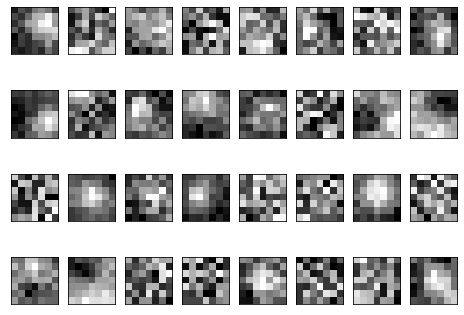

In [ ]:
layer = model.layers #Conv layers at 0, 3, 4, 7
filters, biases = model.layers[0].get_weights()
print(layer[1].name, filters.shape)

   
# plot filters

fig1=plt.figure(figsize=(8, 12))
columns = 8
rows = 8
n_filters = columns * rows
for i in range(1, n_filters +1):
    f = filters[:, :, :, i-1]
    fig1 =plt.subplot(rows, columns, i)
    fig1.set_xticks([])  #Turn off axis
    fig1.set_yticks([])
    plt.imshow(f[:, :, 0], cmap='gray') #Show only the filters from 0th channel (R)
    #ix += 1
plt.show()    

In [ ]:
#Iterate thru all the layers of the model
for layer in model.layers:
    if 'conv' in layer.name:
        weights, bias= layer.get_weights()
        print(layer.name, filters.shape)
        
        #normalize filter values between  0 and 1 for visualization
        f_min, f_max = weights.min(), weights.max()
        filters = (weights - f_min) / (f_max - f_min)  
        print(filters.shape[3])
        filter_cnt=1
        
        #plotting all the filters
        for i in range(filters.shape[3]):
            #get the filters
            filt=filters[:,:,:, i]
            #plotting each of the channel, color image RGB channels
            for j in range(filters.shape[0]):
                ax= plt.subplot(filters.shape[3], filters.shape[0], filter_cnt  )
                ax.set_xticks([])
                ax.set_yticks([])
                plt.imshow(filt[:,:, j])
                filter_cnt+=1
        plt.show()

NameError: ignored